###                                                         Telecom Chrun - ML Group Case Study

                                                                                 Developers: Manu R C, Sudhasrinivas Pallam

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, <b>customer retention </b>has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to <b> predict which customers are at high risk of churn.</b>



In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding and Defining Churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

<b> Note: This project is based on the Indian and Southeast Asian market. i.e Prepaid Customers </b>

 

### Definitions of Churn
There are various ways to define churn, such as:

<b>Revenue-based churn:</b> Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

<b>Usage-based churn:</b> Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

<b>Note: In this project, you will use the usage-based definition to define churn.</b>

 

### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

### Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The <b>business objective</b> is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are <b>three phases</b> of customer lifecycle :

    1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

    2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

    3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

<b> Note: In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. </b>

 

### Steps to follow

    1. Import Data and Analysis
        a. Import data to master dataframe
        b. Do basic analysis like ( shape, no of columns, datatypes, describe)
        c. Null column checks
        d. Outlier check
        e. Correlation check
    2. Data Preparation
        a. Derive New Features
        b. Filter high-value customers
        d. Tag Churners and remove attributes of chrun phase
    3. Feature Engineering
    4. EDA ( Univarient and Bivariant analysis )    
    5. Modelling
        a. Reduce the number of variables using PCA.
        b. Train a variety of models, tune model hyperparameters, etc.                                                                     (handle class imbalance using appropriate    techniques).
        c. Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners              than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.
        d. Finally, choose a model based on some evaluation metric.

#### Import and  Install (if missing) libraries

In [1]:
#new libraries to install if missing 
!pip install imblearn
!pip install missingno

In [82]:
#Import Utility  libraries 
import numpy as np
import pandas as pd

#Import visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import SKLearn libraries for model building
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score,f1_score
#from sklearn import metrics
#for train test split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as statsm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve, auc
from sklearn.decomposition import PCA

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE

#lib fo rmissing values visually 
import missingno as msno


# Import hide warnings
import warnings
warnings.filterwarnings('ignore')

#set options to see all columns in dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

### 1. Import Data and Analysis

In [3]:
#path of the csv to be loaded
path = "telecom_churn_data.csv"

In [4]:
#import dataset
tele_churn_df_master = pd.read_csv(path)

In [5]:
#list top 5 row in the dataset
tele_churn_df_master.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
print("\nMissing values %:", (tele_churn_df_master.isnull().sum())/len(tele_churn_df_master.isnull().sum()))
print("\nUnique values:")
print(tele_churn_df_master.nunique())


Missing values %: mobile_number                 0.000000
circle_id                     0.000000
loc_og_t2o_mou                4.504425
std_og_t2o_mou                4.504425
loc_ic_t2o_mou                4.504425
last_date_of_month_6          0.000000
last_date_of_month_7          2.659292
last_date_of_month_8          4.867257
last_date_of_month_9          7.340708
arpu_6                        0.000000
arpu_7                        0.000000
arpu_8                        0.000000
arpu_9                        0.000000
onnet_mou_6                  17.420354
onnet_mou_7                  17.075221
onnet_mou_8                  23.796460
onnet_mou_9                  34.269912
offnet_mou_6                 17.420354
offnet_mou_7                 17.075221
offnet_mou_8                 23.796460
offnet_mou_9                 34.269912
roam_ic_mou_6                17.420354
roam_ic_mou_7                17.075221
roam_ic_mou_8                23.796460
roam_ic_mou_9                34.269912
roam_o

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [7]:
print(tele_churn_df_master.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [8]:
tele_churn_df_master.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
tele_churn_df_master.shape

(99999, 226)

In [10]:
#Count of rows with more than 70% null values  
len(tele_churn_df_master[tele_churn_df_master.isnull().sum(axis=1)>160].index)

448

### Observations:

As per basic analysis on Telecom Churn dataset following are the observation
    1. Dataset has total 99999 rows and 226 columns
    2. Target varaible was not defined 
    3. Dataset has high missing data columns 
    4. 448 rows has null values in more than 70% columns 
    5. Around 15 columns has only single variance values which may not contribute much for our analysis
    6. Columns datatypes --> float64(179), int64(35), object(12)
    7. All the object datatype columns are Date columns, need to convert the to date type columns 
    

## 2. Data Preparation

### a. Derive New Features

#### Filter the dataset to hold only high value customers
Total of 6 columns will be considered for calculating the average recharge amount. New columns will be created  using the existing columns.
1. <b>total_rech_data_amt_6</b> derived from <b>av_rech_amt_data_6</b> and <b>total_rech_data_6</b>.
2. <b>total_rech_data_amt_7</b> derived from <b>av_rech_amt_data_7</b> and <b>total_rech_data_7</b>.
3. feature <b>jun_vbc_3g</b>
4. feature <b>jul_vbc_3g</b>

In [11]:
#Renaming the month name vbc columns to _monthno columns to make it standardize for data processing 
tele_churn_df_master.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [12]:
#avg recharge amount give the recharge price and total rechrge data give no of times rechange was done
#total_rech_data_amt_6 derived from av_rech_amt_data_6 and total_rech_data_6 
#total_rech_data_amt_7 derived from av_rech_amt_data_7 and total_rech_data_7.
tele_churn_df_master['total_rech_data_amt_6'] = (tele_churn_df_master['av_rech_amt_data_6'] * tele_churn_df_master['total_rech_data_6'])
tele_churn_df_master['total_rech_data_amt_7'] = (tele_churn_df_master['av_rech_amt_data_7'] * tele_churn_df_master['total_rech_data_7'])

#### Actions taken and Observations:
1. Renamed VBC columns to standard format
2. Derived new columns for total data amount for good phase columns 

### b. Filter high-value customers

In [13]:
#Creating a series average churn for good phase ( 6 and 7 months ) Considering derived columns total_rech_data_amt_6, total_rech_data_amt_7
#total_rech_amt_6, total_rech_amt_7 , 
#vbc_3g_6, vbc_3g_7 ( considering vbc columns as we see some amounts which were not part of data and call recharges)
tele_churn_av_rech_67 = (tele_churn_df_master['total_rech_data_amt_6'].fillna(0) 
+tele_churn_df_master['total_rech_data_amt_7'].fillna(0) 
+tele_churn_df_master['total_rech_amt_6'].fillna(0) 
+tele_churn_df_master['total_rech_amt_7'].fillna(0)
+tele_churn_df_master['vbc_3g_6'].fillna(0)
+tele_churn_df_master['vbc_3g_7'].fillna(0))/6

In [14]:
# take 70 percentile of the calculated average amount
percentile_70_6_7 = np.percentile(tele_churn_av_rech_67, 70.0)
print("70th percentile of the average recharge amount during the happy phase (June and July) is : ", percentile_70_6_7)

70th percentile of the average recharge amount during the happy phase (June and July) is :  172.39466666666647


In [15]:
#Deriving High Value Customers dataset from the master dataset 
#where average recharge amount greater than 70% of average recharge 
tele_hv_cust = tele_churn_df_master[tele_churn_av_rech_67 >= percentile_70_6_7]

In [16]:
print("\nMissing values %:", (tele_hv_cust.isnull().sum())/len(tele_hv_cust.isnull().sum()))
print("\nUnique values:")
print(tele_hv_cust.nunique())


Missing values %: mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.951754
std_og_t2o_mou               0.951754
loc_ic_t2o_mou               0.951754
last_date_of_month_6         0.000000
last_date_of_month_7         0.171053
last_date_of_month_8         0.820175
last_date_of_month_9         1.732456
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  2.425439
onnet_mou_7                  2.451754
onnet_mou_8                  5.276316
onnet_mou_9                  8.434211
offnet_mou_6                 2.425439
offnet_mou_7                 2.451754
offnet_mou_8                 5.276316
offnet_mou_9                 8.434211
roam_ic_mou_6                2.425439
roam_ic_mou_7                2.451754
roam_ic_mou_8                5.276316
roam_ic_mou_9                8.434211
roam_og_mou_6                2.

mobile_number               30000
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      28929
arpu_7                      28973
arpu_8                      27952
arpu_9                      26840
onnet_mou_6                 16260
onnet_mou_7                 16318
onnet_mou_8                 15280
onnet_mou_9                 14559
offnet_mou_6                20693
offnet_mou_7                20666
offnet_mou_8                19618
offnet_mou_9                18695
roam_ic_mou_6                3994
roam_ic_mou_7                3299
roam_ic_mou_8                3379
roam_ic_mou_9                3083
roam_og_mou_6                4625
roam_og_mou_7                3878
roam_og_mou_8                3893
roam_og_mou_9                3574
loc_og_t2t_mou

In [17]:
tele_hv_cust.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_6,total_rech_data_amt_7
count,3.000000e+04,30000.0,29783.0,29783.0,29783.0,30000.000000,30000.000000,30000.000000,30000.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.00000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000000,29447.0,29441.0,28797.0,28077.0,29447.000000,29441.000000,28797.000000,28077.000000,29447.000000,29441.000000,28797.000000,28077.000

#### Action Taken and Observations:
1. Created a series average churn for good phase ( 6 and 7 months ) Considering derived columns total_rech_data_amt_6, total_rech_data_amt_7 total_rech_amt_6, total_rech_amt_7 , vbc_3g_6, vbc_3g_7 ( considering vbc columns as we see some amounts which were not part of data and call recharges)
2. Calculated 70% of the average 
3. Created a new dataset with greater than or equal to 70% of average recharge amount 
4. Around 29.9K records were high value customers 
5. Column count increased to 228 by deriving couple of new columns 

### c. Tag Churners and remove attributes of chrun phase

#### Create churn column
As we a re caluculating churn based on usage, following attributes needed to determined churn values are:<br>
1. total_ic_mou_9<br>
2. total_og_mou_9<br>
3. vol_2g_mb_9<br>
4. vol_3g_mb_9<br>

If Incoming, Outgoing, 2g Data usage and 3G data usage is Zero we can consider the customer is churn in Churn Phase columns

In [18]:
# lets introduce a new column "churn", values would be either 1 (churn) or 0 (non-churn)
tele_hv_cust['churn'] = np.where(tele_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
tele_hv_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_6,total_rech_data_amt_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0

In [19]:
# Now we will delete 9th month columns because 
#we would predict churn/non-churn later based on data from the Good Phase and Action phase months
_9_cols_to_drop = [col for col in tele_hv_cust.columns if '_9' in col]
print(_9_cols_to_drop)

tele_hv_cust.drop(_9_cols_to_drop, axis=1, inplace=True)

tele_hv_cust.shape

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9']


(30000, 174)

In [20]:
# lets find out churn/non churn percentage
tele_hv_cust['churn'].value_counts()/len(tele_hv_cust)*100

0    91.906667
1     8.093333
Name: churn, dtype: float64

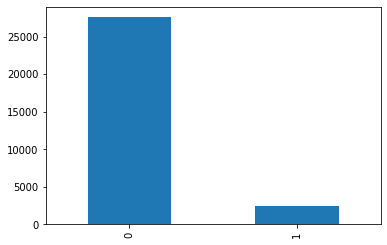

In [21]:
#Bar plot for value counts on churn columns
tele_hv_cust['churn'].value_counts().plot(kind='bar')

### Action taken and Observation:
1. Tagged churn customer based on usage of Incoming, outgoing, 2G and 3G data usage
2. Marked churned customers as 1 and non churn as 0
3. Dropped all churn phase columns as we dont need them for our analysis
4. After dropping _9 columns the column count came down to 174 from 228
5. As per value counts and the bar plot above the dataset is an imbalanced dataset with close to 92% not churn customers and 8% churn customers

### Feature Engineering

#### As the column count is high performing Feature Engineering even before EDA 

In [22]:
tele_hv_cust.shape

(30000, 174)

In [23]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = tele_hv_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])
# convert to datetime
for col in object_col_data.columns:
    tele_hv_cust[col] = pd.to_datetime(tele_hv_cust[col])

tele_hv_cust.shape

last_date_of_month_6        6/30/2014
last_date_of_month_7        7/31/2014
last_date_of_month_8        8/31/2014
date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
Name: 0, dtype: object


(30000, 174)

In [24]:
# dropping last_date_of_month_6,7,8 since the value is same throughout each column
# dropping date_of_last_rech_6,7,8 and date_of_last_rech_data_6,7,8 since there are a large number of null values
tele_hv_cust = tele_hv_cust.drop(object_col_data.columns, axis=1)

In [25]:
print ("Shape of the dataframe after dropping the date columns: ",tele_hv_cust.shape)

Shape of the dataframe after dropping the date columns:  (30000, 165)


In [26]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = tele_hv_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
print("List of columns with _6 and _7 suffix:", len(col_list))

List of columns with _6 and _7 suffix: 106


In [27]:
# lets take the average now
for idx, col in enumerate(col_list.unique()):
    if col!='tele_chrun_av_rech_67':
        avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
        col_6 = col+"_6"
        col_7 = col+"_7"
        tele_hv_cust[avg_col_name] = (tele_hv_cust[col_6]  + tele_hv_cust[col_7])/ 2

In [28]:
print("Total number of columns after adding new ones:", len(tele_hv_cust.columns))

Total number of columns after adding new ones: 218


In [29]:
# Now we will delete 7th month columns as we have created average of 6 and 7 months as it is Good Phase
_7_cols_to_drop = [col for col in tele_hv_cust.columns if '_7' in col]
# print(_7_cols_to_drop)
tele_hv_cust.drop(_7_cols_to_drop, axis=1, inplace=True)

In [30]:
# Now we will delete 6th month columns as we have created average of 6 and 7 months as it is Good Phase
_6_cols_to_drop = [col for col in tele_hv_cust.columns if '_6' in col]
# print(_6_cols_to_drop)
tele_hv_cust.drop(_6_cols_to_drop, axis=1, inplace=True)

In [31]:
print("Shape of the dataset after deleting the _6 and _7 columns: ", tele_hv_cust.shape)

Shape of the dataset after deleting the _6 and _7 columns:  (30000, 112)


In [32]:
# lets check the columns with no variance in their values and drop such columns
for i in tele_hv_cust.columns:
    if tele_hv_cust[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", tele_hv_cust[i].nunique(),"unique value")
        print("Dropping the column",i)
        tele_hv_cust.drop(i,axis=1,inplace = True)

print("\nDimension of the updated dataset:",tele_hv_cust.shape)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column std_og_t2c_mou_8 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_8

Column std_ic_t2o_mou_8 has no variance and contains only 1 unique value
Dropping the column std_ic_t2o_mou_8

Column avg_std_og_t2c_mou_av67 has no variance and contains only 1 unique value
Dropping the column avg_std_og_t2c_mou_av67

Column avg_std_ic_t2o_mou_av67 has no variance and contains only 1 unique value
Dropping the column avg_std_ic_t2o_mou_av67

Dimension of the updated dataset: (30000, 104)


### Missing Values analysis and imputation

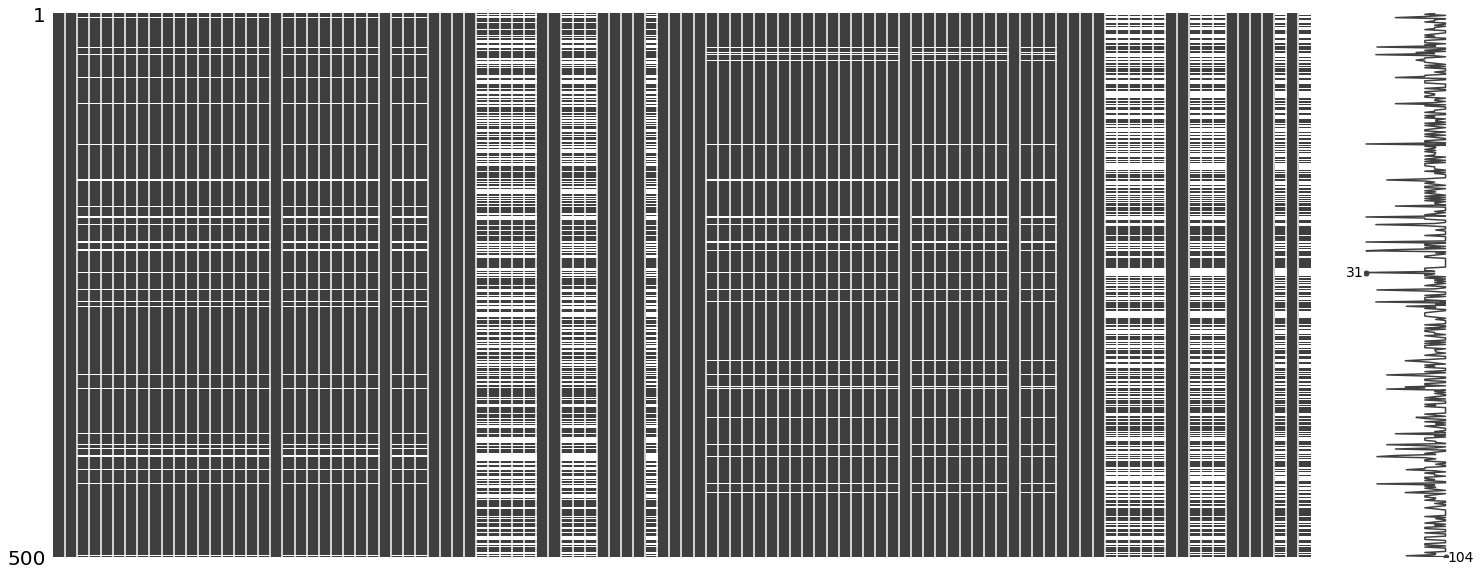

In [33]:
### Visualization of missing columns for sample data 
msno.matrix(tele_hv_cust.sample(500))

In [34]:
#Missing values based on percentages in sorted order 
total = tele_hv_cust.isnull().sum().sort_values(ascending=False)
percent = (tele_hv_cust.isnull().sum()/tele_hv_cust.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, round(percent*100,2)], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(80)

,Total Missing Count,% of Total Observations
Feature,,
avg_total_rech_data_amt_av67,14964,49.88
avg_arpu_2g_av67,14964,49.88
avg_total_rech_data_av67,14964,49.88
avg_max_rech_data_av67,14964,49.88
avg_count_rech_2g_av67,14964,49.88
avg_count_rech_3g_av67,14964,49.88
avg_av_rech_amt_data_av67,14964,49.88
avg_arpu_3g_av67,14964,49.88
avg_night_pck_user_av67,14964,49.88


### Analysis of Missing Data:
1. All Average columns of Good Phase related to ARPU, Recharge(data and calls) has 50% missing values which means users has not done the recharge on these months and ARPU is also null. So, we can impute 0 to missing values in these columns
2. Columns of Action Phase related to ARPU, Recharge(data and calls) has  43% missng values which means users has not done the recharge on these action months and ARPU is also null. So, we can impute 0 to missing values in these columns
3. All MOU columns of Action phase has 0.03% of missing values means user has stopped using incoming and outgoing calls. So, we can impute 0 in this case as well
4. All Average MOU columns of Good phase has 0.02% of missing values means user has stopped using incoming and outgoing calls. So, we can impute 0 in this case as well

In [35]:
#Imputing 0 to the missing columns as per our analysis
for eachcol in missing_data.index.tolist():
    tele_hv_cust[eachcol] = tele_hv_cust[eachcol].fillna(0)

In [36]:
#Checking null value % after imputing data
total = tele_hv_cust.isnull().sum().sort_values(ascending=False)

percent = (tele_hv_cust.isnull().sum()/tele_hv_cust.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'

In [37]:
print("Final shape of the dataframe after feature engineering: ", tele_hv_cust.shape)

Final shape of the dataframe after feature engineering:  (30000, 104)


### 4. EDA ( Univarient and Bivariant analysis  )

#### Univariate Analysis

In [38]:
tele_hv_cust = tele_hv_cust[tele_hv_cust.avg_total_rech_data_amt_av67<10000]

### Total recharge amount in happy (June, July) and action (August) phase

In [39]:
def recharge_range(x):
    if x<1000:
        return '<1000'
    elif x<3000:
        return '<3000'
    elif x<5000:
        return '<5000'
    elif x<7000:
        return '<7000'
    elif x<10000:
        return '<10000'
    elif x>10000:
        return 'greater than 10000'

In [40]:
recharge_range_data_happy = tele_hv_cust['avg_total_rech_data_amt_av67'].apply(lambda x: recharge_range(x))
average_data_8 = tele_hv_cust['av_rech_amt_data_8']*tele_hv_cust['total_rech_data_8']
recharge_range_data_action = average_data_8.apply(lambda x: recharge_range(x))

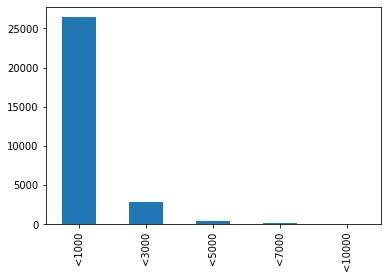

In [41]:
recharge_range_data_happy.value_counts().plot.bar()

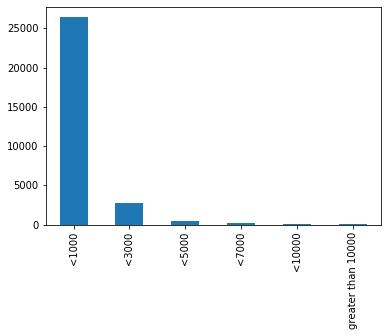

In [42]:
recharge_range_data_action.value_counts().plot.bar()

90% of data recharges happen below the amount of 1000 

In [43]:
# Creating 2 new series to find the recharge values in happy and action phase
recharge_range_call_happy = tele_hv_cust['avg_total_rech_amt_av67'].apply(lambda x: recharge_range(x))
recharge_range_call_action = tele_hv_cust['total_rech_amt_8'].apply(lambda x: recharge_range(x))

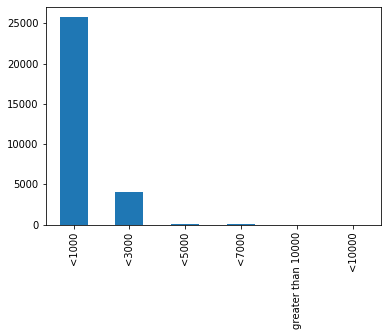

In [44]:
recharge_range_call_happy.value_counts().plot.bar()

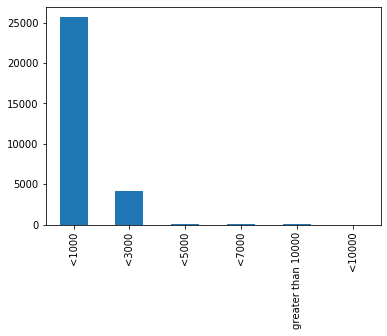

In [45]:
recharge_range_call_action.value_counts().plot.bar()

Around 85% of the regular recharges happen below the amount of 1000

#### We can conclude that, call recharges go over 1000 more often than data recharges

In [46]:
total_amount_cols = [col for col in tele_hv_cust.columns if 'total_rech' in col]

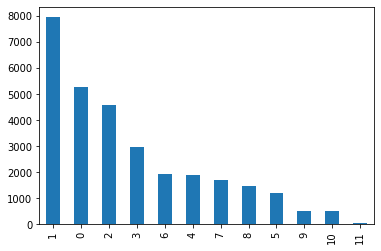

In [47]:
aon_range = tele_hv_cust['aon'].apply(lambda x: x//365)
aon_range.value_counts().plot(kind='bar')

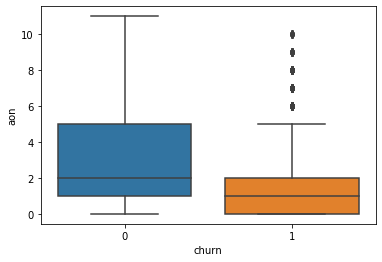

In [48]:
sns.boxplot(tele_hv_cust.churn, aon_range)

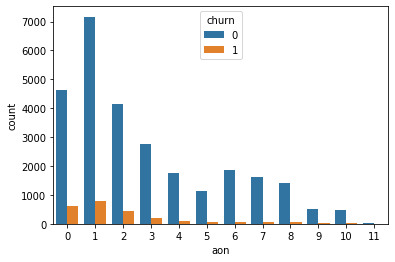

In [49]:
sns.countplot(x = aon_range, hue = tele_hv_cust.churn)

### Observation: 
1. High-value customers whose tenure is more than 3 years tend to stay with the network longer than those with tenure less than 3 years

In [50]:
def dist_plot_features(feature_type):
#     plt.figure(figsize=(18,20))
    data = tele_hv_cust.copy()
    for i,feature in enumerate(feature_type):
#         plt.subplot(3,2,i+1)
        data[feature].hist(bins=50)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

In [51]:
arpu = ['avg_arpu_3g_av67','arpu_3g_8','avg_arpu_2g_av67','arpu_2g_8','avg_arpu_av67','arpu_8']

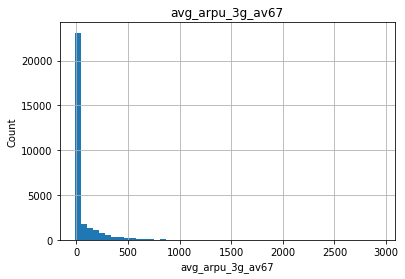

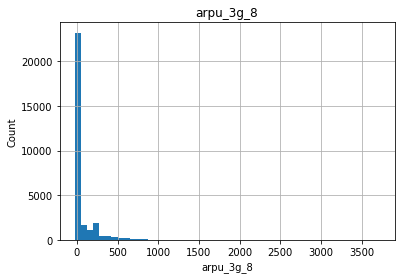

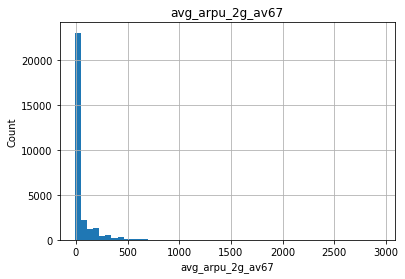

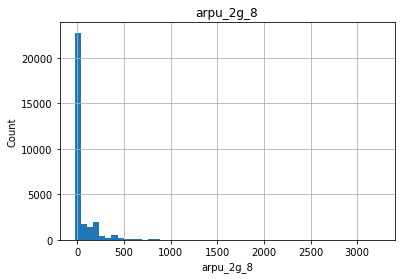

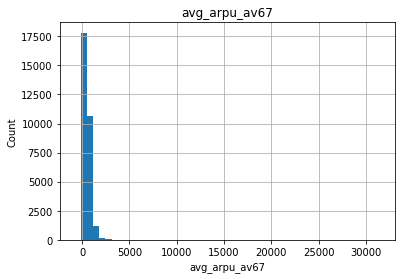

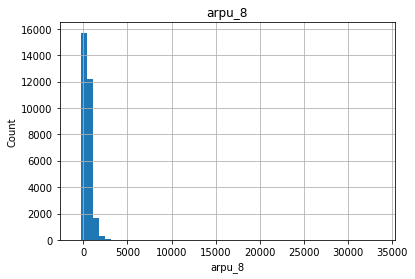

In [52]:
dist_plot_features(arpu)

### Observation
1. Average revenue is around 500 for data users and around 2000 for customers who use this for calling purposes

## Bivariate Analysis

#### Analysis of total Incoming / Outgoing calls ( Good Phase vs Action Phase )

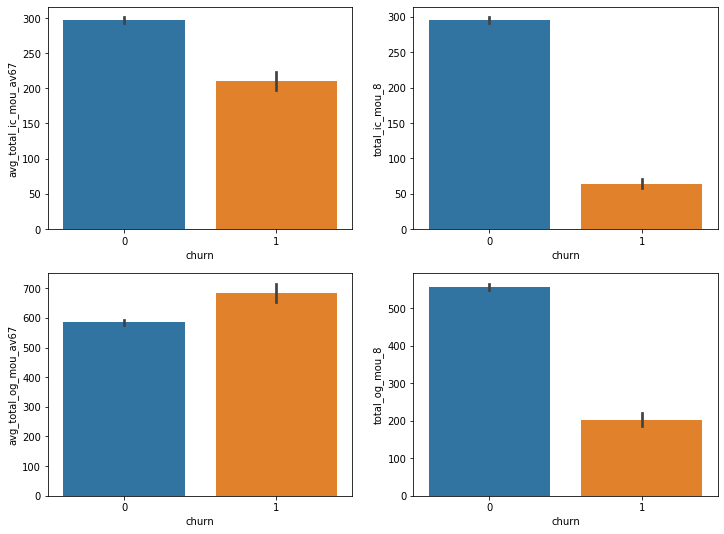

In [53]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
sns.barplot(y='avg_total_ic_mou_av67', x='churn', data=tele_hv_cust)
plt.subplot(2,2,2)
sns.barplot(y='total_ic_mou_8', x='churn', data=tele_hv_cust)
plt.subplot(2,2,3)
sns.barplot(y='avg_total_og_mou_av67', x='churn', data=tele_hv_cust)
plt.subplot(2,2,4)
sns.barplot(y='total_og_mou_8', x='churn', data=tele_hv_cust)
plt.show()

### Observation:
1. No of incoming and out going calls are decreased  for churn customers in action phase (Aug month) 

#### Analysis of recharge columns ( Good Phase vs Action Phase )

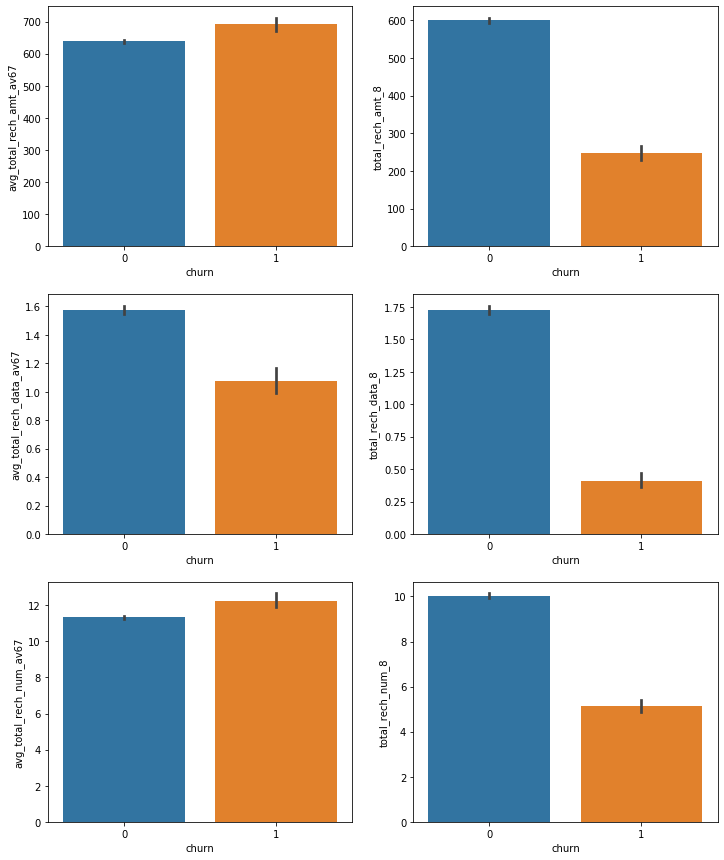

In [54]:
plt.figure(figsize=(12,15))
plt.subplot(3,2,1)
sns.barplot(y=tele_hv_cust.avg_total_rech_amt_av67, x=tele_hv_cust.churn)
plt.subplot(3,2,2)
sns.barplot(y=tele_hv_cust.total_rech_amt_8, x=tele_hv_cust.churn)
plt.subplot(3,2,3)
sns.barplot(y=tele_hv_cust.avg_total_rech_data_av67, x=tele_hv_cust.churn)
plt.subplot(3,2,4)
sns.barplot(y=tele_hv_cust.total_rech_data_8, x=tele_hv_cust.churn)
plt.subplot(3,2,5)
sns.barplot(y=tele_hv_cust.avg_total_rech_num_av67, x=tele_hv_cust.churn)
plt.subplot(3,2,6)
sns.barplot(y=tele_hv_cust.total_rech_num_8, x=tele_hv_cust.churn)
plt.show()

### Observation:
1. Avg Recharge for Data and Call and number of recharges were significantly decreaded in Action phase  in the case of Churn customers

#### Analysis of 2G / 3G Data usage ( Good Phase vs Action Phase )

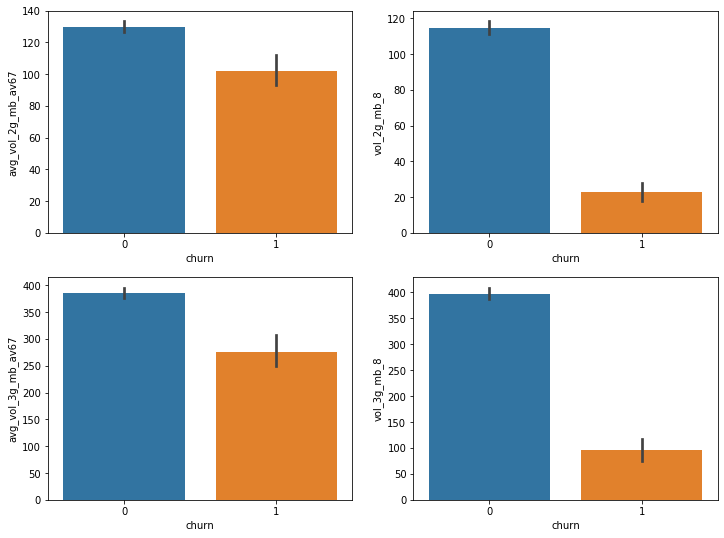

In [55]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
sns.barplot(y=tele_hv_cust.avg_vol_2g_mb_av67, x=tele_hv_cust.churn)
plt.subplot(2,2,2)
sns.barplot(y=tele_hv_cust.vol_2g_mb_8, x=tele_hv_cust.churn)
plt.subplot(2,2,3)
sns.barplot(y=tele_hv_cust.avg_vol_3g_mb_av67, x=tele_hv_cust.churn)
plt.subplot(2,2,4)
sns.barplot(y=tele_hv_cust.vol_3g_mb_8, x=tele_hv_cust.churn)

#### Observation:
    1. 3G and 2G data comsumption significantly decreaded in churn customers in action phase 

#### Analysis of local, STD, ISD, Roaming --> Incoming / Outgoing calls ( Good Phase vs Action Phase )

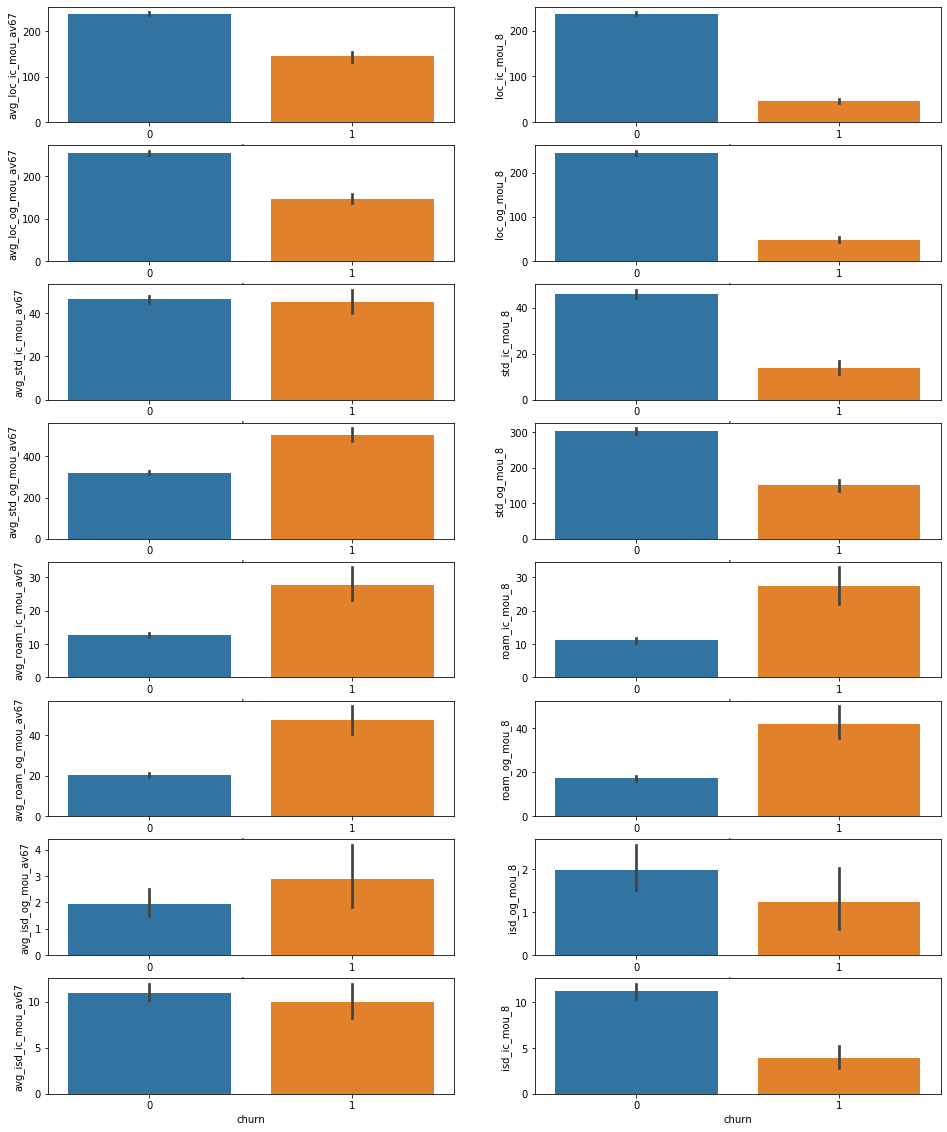

In [56]:
plt.figure(figsize=(16,20))
plt.subplot(8,2,1)
sns.barplot(y=tele_hv_cust.avg_loc_ic_mou_av67, x=tele_hv_cust.churn)
plt.subplot(8,2,2)
sns.barplot(y=tele_hv_cust.loc_ic_mou_8, x=tele_hv_cust.churn)
plt.subplot(8,2,3)
sns.barplot(y=tele_hv_cust.avg_loc_og_mou_av67, x=tele_hv_cust.churn)
plt.subplot(8,2,4)
sns.barplot(y=tele_hv_cust.loc_og_mou_8, x=tele_hv_cust.churn)
plt.subplot(8,2,5)
sns.barplot(y=tele_hv_cust.avg_std_ic_mou_av67, x=tele_hv_cust.churn)
plt.subplot(8,2,6)
sns.barplot(y=tele_hv_cust.std_ic_mou_8, x=tele_hv_cust.churn)
plt.subplot(8,2,7)
sns.barplot(y=tele_hv_cust.avg_std_og_mou_av67, x=tele_hv_cust.churn)
plt.subplot(8,2,8)
sns.barplot(y=tele_hv_cust.std_og_mou_8, x=tele_hv_cust.churn)
plt.subplot(8,2,9)
sns.barplot(y=tele_hv_cust.avg_roam_ic_mou_av67, x=tele_hv_cust.churn)
plt.subplot(8,2,10)
sns.barplot(y=tele_hv_cust.roam_ic_mou_8, x=tele_hv_cust.churn)
plt.subplot(8,2,11)
sns.barplot(y=tele_hv_cust.avg_roam_og_mou_av67, x=tele_hv_cust.churn)
plt.subplot(8,2,12)
sns.barplot(y=tele_hv_cust.roam_og_mou_8, x=tele_hv_cust.churn)
plt.subplot(8,2,13)
sns.barplot(y=tele_hv_cust.avg_isd_og_mou_av67, x=tele_hv_cust.churn)
plt.subplot(8,2,14)
sns.barplot(y=tele_hv_cust.isd_og_mou_8, x=tele_hv_cust.churn)
plt.subplot(8,2,15)
sns.barplot(y=tele_hv_cust.avg_isd_ic_mou_av67, x=tele_hv_cust.churn)
plt.subplot(8,2,16)
sns.barplot(y=tele_hv_cust.isd_ic_mou_8, x=tele_hv_cust.churn)

plt.show()

#### Observation: 
1. With in the circle Local, STD and ISD  Incoming and Outgoing are significantly reduced in the case of high value churn customers

2. Roaming incoming and outgoing doesn't have much impact on churn

In [57]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = tele_hv_cust.corr()

cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
corr_series = cor[(cor > 0.70) | (cor < -0.70)].sort_values()

In [58]:
corr_series

avg_fb_user_av67              avg_max_rech_data_av67       0.701343
avg_sachet_2g_av67            count_rech_2g_8              0.701542
avg_std_ic_mou_av67           avg_std_ic_t2t_mou_av67      0.705521
arpu_2g_8                     max_rech_data_8              0.706134
avg_std_ic_t2m_mou_av67       std_ic_t2m_mou_8             0.707351
avg_total_rech_data_amt_av67  avg_av_rech_amt_data_av67    0.707851
avg_fb_user_av67              avg_av_rech_amt_data_av67    0.708620
avg_sachet_2g_av67            sachet_2g_8                  0.715223
avg_vol_3g_mb_av67            vol_3g_mb_8                  0.715771
avg_std_og_t2m_mou_av67       std_og_t2m_mou_8             0.716271
monthly_3g_8                  av_rech_amt_data_8           0.719031
avg_total_og_mou_av67         avg_onnet_mou_av67           0.721539
avg_total_rech_num_av67       total_rech_num_8             0.723313
avg_offnet_mou_av67           offnet_mou_8                 0.731320
avg_std_ic_mou_av67           std_ic_mou_8      

In [59]:
# Extacting the unique features from this highly correlated list
cor_list = []
for ind,i in enumerate(corr_series.index):
    cor_list.append(i[1])
from collections import OrderedDict
print(list(OrderedDict.fromkeys(cor_list)))

['avg_max_rech_data_av67', 'count_rech_2g_8', 'avg_std_ic_t2t_mou_av67', 'max_rech_data_8', 'std_ic_t2m_mou_8', 'avg_av_rech_amt_data_av67', 'sachet_2g_8', 'vol_3g_mb_8', 'std_og_t2m_mou_8', 'av_rech_amt_data_8', 'avg_onnet_mou_av67', 'total_rech_num_8', 'offnet_mou_8', 'std_ic_mou_8', 'onnet_mou_8', 'total_ic_mou_8', 'total_og_mou_8', 'ic_others_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'total_rech_amt_8', 'avg_offnet_mou_av67', 'std_og_mou_8', 'avg_std_og_t2t_mou_av67', 'avg_vol_3g_mb_av67', 'std_og_t2t_mou_8', 'avg_loc_ic_t2m_mou_av67', 'arpu_8', 'avg_std_og_t2m_mou_av67', 'loc_og_t2f_mou_8', 'avg_loc_og_t2t_mou_av67', 'loc_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2m_mou_8', 'avg_count_rech_3g_av67', 'avg_loc_og_t2m_mou_av67', 'avg_total_rech_data_av67', 'avg_std_ic_t2m_mou_av67', 'avg_arpu_3g_av67', 'loc_og_mou_8', 'avg_arpu_2g_av67', 'avg_std_og_mou_av67', 'arpu_3g_8', 'count_rech_3g_8', 'arpu_2g_8', 'avg_loc_ic_mou_av67

In [60]:
# Displaying heatmap for all features
cor = tele_hv_cust[list(OrderedDict.fromkeys(cor_list))].corr()

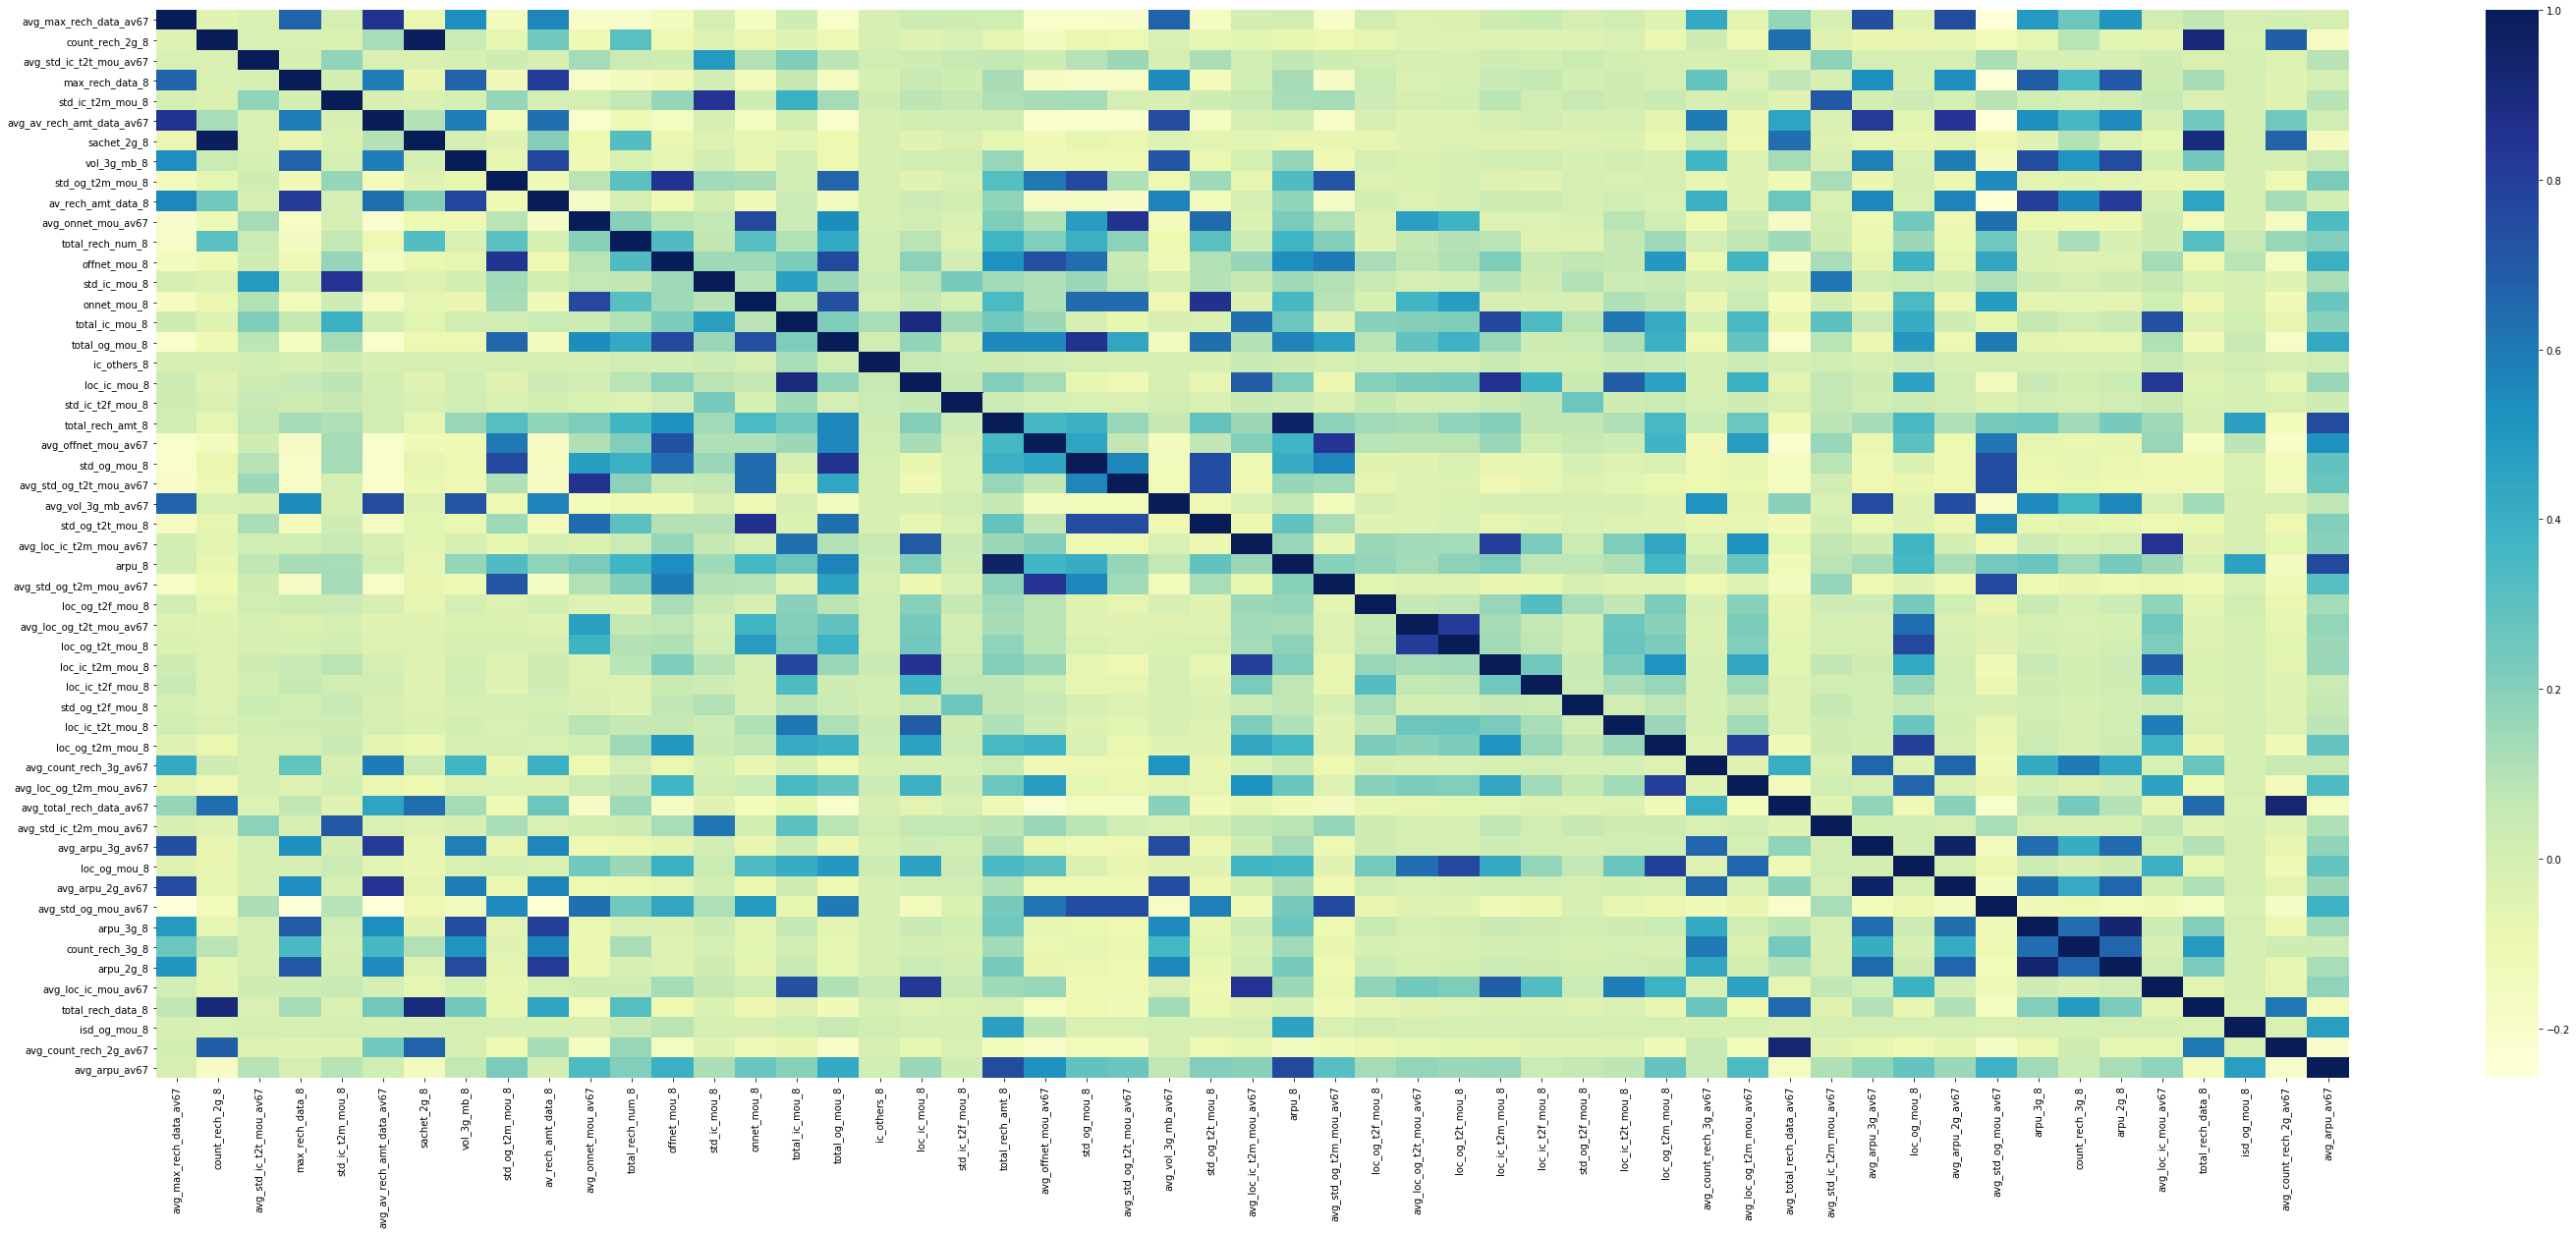

In [61]:
plt.figure(figsize=(50,20))
sns.heatmap(cor,  cmap="YlGnBu", annot=False)
plt.show()

In [62]:
# Manually selected columns with more than 85% correlation
high_corr_cols=['sachet_2g_8','count_rech_2g_8','avg_arpu_av67','arpu_8','avg_sachet_2g_av67','arpu_2g_8','avg_count_rech_2g_av67','loc_ic_mou_8','avg_loc_ic_mou_av67','avg_sachet_2g_av67','arpu_2g_8','std_og_mou_8']

In [63]:
high_cor = tele_hv_cust[high_corr_cols].corr()

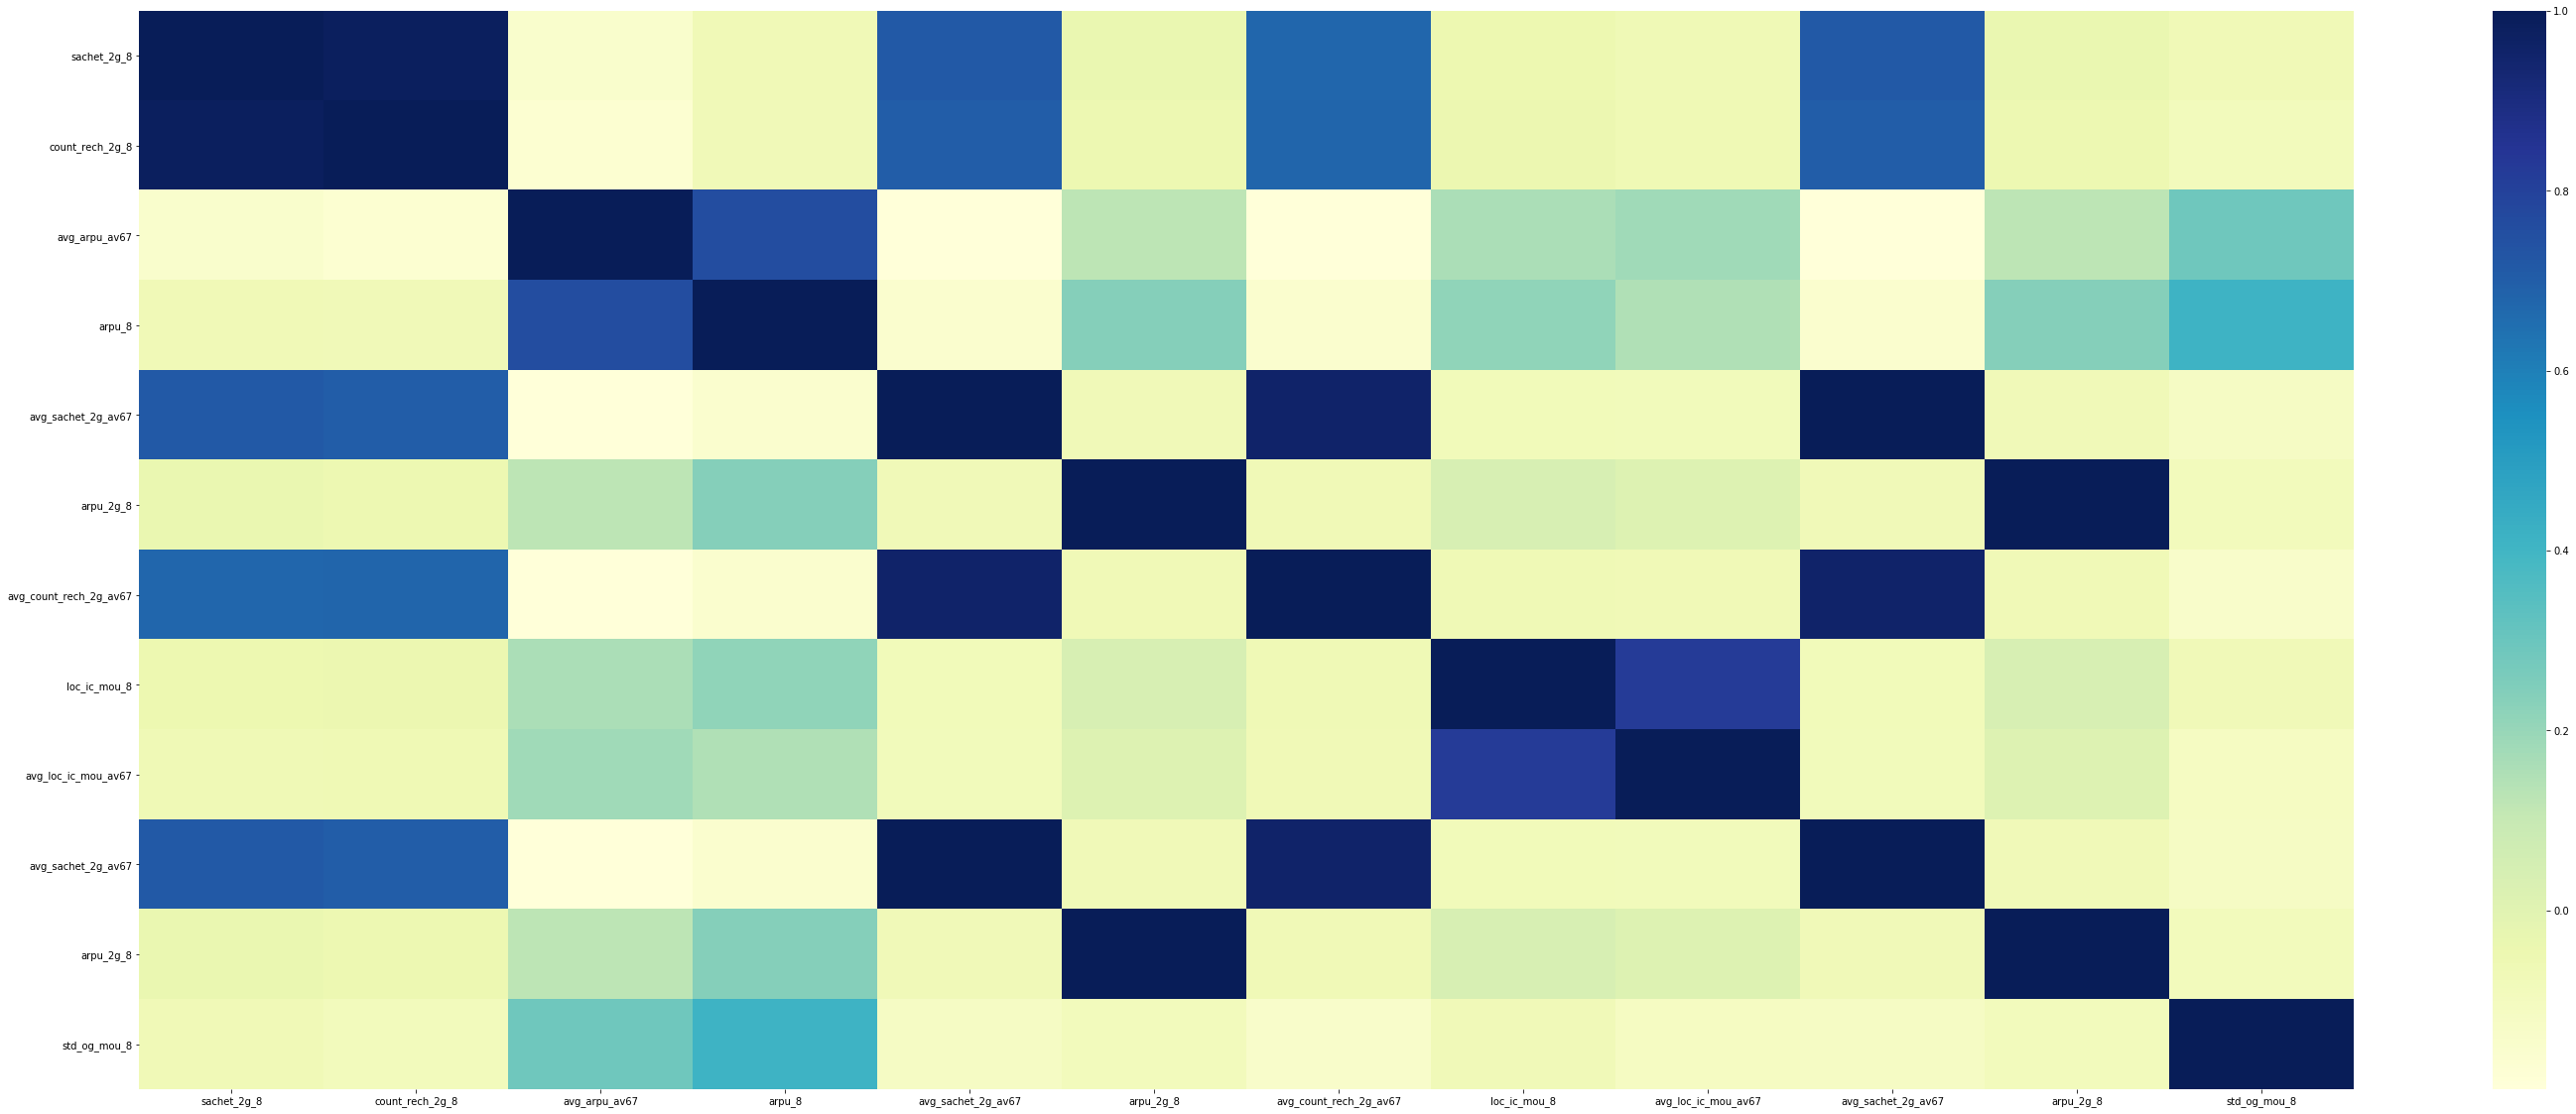

In [64]:
# Displaying heatmap for highly correlated features
plt.figure(figsize=(50,20))
sns.heatmap(high_cor,  cmap="YlGnBu", annot=False)
plt.show()

### Dropping Highly correlated columns based on correlation analysis from heatmap and correlation percentages 

In [65]:
tele_hv_cust = tele_hv_cust.drop(tele_hv_cust[high_corr_cols],axis=1)

In [66]:
print("Shape of the dataframe after deleting the highly correlated columns ", tele_hv_cust.shape)

Shape of the dataframe after deleting the highly correlated columns  (29922, 94)


## 5. Modelling

### Choosing Right metrics for evalution of our problem 

As out dataset has 

0  -->   91.863605 % --> not churn 

1  -->    8.136395 % --> churn 

As per data the dataset is an unbalanced dataset, and the problem statement is binary classification problem 

we have different metrics to choose
 
    1) Confusion Matrix
    2) Accuracy
    3) Recall
    4) Precision
    5) F Beta 
    6) ROC curve
    7) AUC Curve
    
As per the domain sensitivity, of finding about to churn customers is very much important, 
so that they can offer some discounts or kind of offers and retain them 

So, we can choose Recall and Accuracy suitable metrics 

In [68]:
# Initialize the scaler
scaler = StandardScaler()

In [69]:
# Deleting the feature mobile_number and churn from X
X = tele_hv_cust.drop(['churn','mobile_number'],axis=1)

In [70]:
# Creating the target variable
y = tele_hv_cust['churn']

In [71]:
y.shape
X.shape

(29922, 92)

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [73]:
# X_train = scaler.fit_transform(X_train)
X_train[X_train.columns] = scaler.fit_transform(X_train)

In [74]:
# Transforming the test dataset as well
X_test[X_test.columns] = scaler.transform(X_test)

In [75]:
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38602, 92)
(38602,)


In [76]:
X_tr = pd.DataFrame(X_tr, columns=X_train.columns)

### Logistic Regression Model Without PCA

In [78]:
logreg = LogisticRegression(penalty='l1', C=1, solver='liblinear')
rfe = RFE(logreg, 30)
rfe = rfe.fit(X_tr,y_tr)

In [80]:
# Saving the most relevant features obtained from RFE
col = X.columns[rfe.support_]

#### Use statsmodels to find the statistical significance of features and also VIF to further bring down the features

In [83]:
X_tr_sm = statsm.add_constant(X_tr[col])
logm2 = statsm.GLM(y_tr,X_tr_sm, family = statsm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38602
Model:                            GLM   Df Residuals:                    38571
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Nov 2020   Deviance:                          nan
Time:                        21:54:55   Pearson chi2:                 2.89e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.0441      0.030    -68.813      0.000      -2.102      -1.986
loc_og_mou_8                 -0.3284      0.065     -5.043      0.000      -0.456      -0.201
std_og_t2f_mou_8             -0.2764      0.050     -5.514      0.000      -0.375      -0.178
total_og_mou_8               -0.6398      0.037    -17.164      0.000      -0.713      -0.567
loc_ic_t2t_mou_8             -0.6705      0.097     -6.899      0.000      -0.861      -0.480
loc_ic_t2m_mou_8             -1.5899      0.104    -15.282      0.000      -1.794      -1.386
std_ic_t2t_mou_8             -0.3768      0.059     -6.353      0.000      -0.493      -0.261
total_ic_mou_8               -0.7397      0.106     -6.955      0.000      -0.948      -0.531
spl_ic_mou_8                 -0.3615      0.028    -12.901      0.000      -0.416      -0.307
total_rech_num_8             -0.4586      0.027    -16.996      0.000      -0.511      -0.406
last_day_rch_amt_8           -0.4929      0.024    -20.558      0.000      -0.540      -0.446
total_rech_data_8            -0.8173      0.046    -17.892      0.000      -0.907      -0.728
vol_2g_mb_8                  -0.3095      0.033     -9.340      0.000      -0.374      -0.245
fb_user_8                    -0.3734      0.025    -15.115      0.000      -0.422      -0.325
aon                          -0.3065      0.019    -16.323      0.000      -0.343      -0.270
vbc_3g_8                     -0.3044      0.028    -10.722      0.000      -0.360      -0.249
avg_loc_og_mou_av67          -0.1298      0.111     -1.171      0.242      -0.347       0.087
avg_std_og_mou_av67          -0.1919      0.162     -1.188      0.235      -0.508       0.125
avg_total_og_mou_av67         0.4329      0.189      2.294      0.022       0.063       0.803
avg_loc_ic_t2t_mou_av67      -2.8885      0.232    -12.474      0.000      -3.342      -2.435
avg_loc_ic_t2m_mou_av67      -3.5806      0.314    -11.388      0.000      -4.197      -2.964
avg_loc_ic_t2f_mou_av67      -1.1064      0.074    -14.967      0.000      -1.251      -0.962
avg_std_ic_t2m_mou_av67      -0.3119      0.040     -7.725      0.000      -0.391      -0.233
avg_std_ic_mou_av67          -2.3401      0.210    -11.162      0.000      -2.751      -1.929
avg_total_ic_mou_av67         7.2696      0.529     13.741      0.000       6.233       8.307
avg_isd_ic_mou_av67          -1.4933      0.118    -12.688      0.000      -1.724      -1.263
avg_ic_others_av67           -0.5336      0.053    -10.072      0.000      -0.637      -0.430
avg_total_rech_amt_av67       0.3206      0.025     12.825      0.000       0.272       0.370
avg_total_rech_data_av67      0.3870      0.027     14.560      0.000       0.335       0.439
avg_av_rech_amt_data_av67    -0.6456      0.045    -14.245      0.000      

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_tr[col].columns
vif['VIF'] = [variance_inflation_factor(X_tr[col].values, i) for i in range(X_tr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     Features      VIF
23      avg_total_ic_mou_av67  72.0642
17      avg_total_og_mou_av67  46.2264
16        avg_std_og_mou_av67  38.0871
19    avg_loc_ic_t2m_mou_av67  27.1827
22        avg_std_ic_mou_av67  16.2392
6              total_ic_mou_8  14.5562
18    avg_loc_ic_t2t_mou_av67  13.2487
15        avg_loc_og_mou_av67  12.5723
4            loc_ic_t2m_mou_8   8.8470
28  avg_av_rech_amt_data_av67   7.1409
29           avg_arpu_2g_av67   5.1075
3            loc_ic_t2t_mou_8   4.7129
0                loc_og_mou_8   4.3011
24        avg_isd_ic_mou_av67   3.8734
21    avg_std_ic_t2m_mou_av67   3.4677
2              total_og_mou_8   3.0925
10          total_rech_data_8   2.4401
12                  fb_user_8   2.3912
27   avg_total_rech_data_av67   2.3461
5            std_ic_t2t_mou_8   2.2270
20    avg_loc_ic_t2f_mou_av67   2.1749
8            total_rech_num_8   2.0230
26    avg_total_rech_amt_av67   2.0014
9          last_day_rch_amt_8   1.3640
14                   vbc_

In [87]:
# Delete feature with highest VIF
col = col.drop('avg_total_ic_mou_av67')
X_tr_sm = statsm.add_constant(X_tr[col])
logm2 = statsm.GLM(y_tr,X_tr_sm, family = statsm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38602
Model:                            GLM   Df Residuals:                    38573
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14559.
Date:                Mon, 02 Nov 2020   Deviance:                       29118.
Time:                        21:56:11   Pearson chi2:                 1.04e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.0277      0.030    -68.500      0.000      -2.086      -1.970
loc_og_mou_8                 -0.2746      0.065     -4.252      0.000      -0.401      -0.148
std_og_t2f_mou_8             -0.2886      0.051     -5.697      0.000      -0.388      -0.189
total_og_mou_8               -0.6846      0.037    -18.275      0.000      -0.758      -0.611
loc_ic_t2t_mou_8             -0.8820      0.096     -9.159      0.000      -1.071      -0.693
loc_ic_t2m_mou_8             -1.7315      0.098    -17.680      0.000      -1.924      -1.540
std_ic_t2t_mou_8             -0.0520      0.037     -1.421      0.155      -0.124       0.020
total_ic_mou_8               -0.4593      0.094     -4.899      0.000      -0.643      -0.276
spl_ic_mou_8                 -0.3817      0.028    -13.481      0.000      -0.437      -0.326
total_rech_num_8             -0.4919      0.027    -18.249      0.000      -0.545      -0.439
last_day_rch_amt_8           -0.5190      0.024    -21.689      0.000      -0.566      -0.472
total_rech_data_8            -0.7969      0.045    -17.525      0.000      -0.886      -0.708
vol_2g_mb_8                  -0.3210      0.033     -9.668      0.000      -0.386      -0.256
fb_user_8                    -0.3706      0.025    -15.064      0.000      -0.419      -0.322
aon                          -0.3039      0.019    -16.334      0.000      -0.340      -0.267
vbc_3g_8                     -0.3067      0.028    -10.858      0.000      -0.362      -0.251
avg_loc_og_mou_av67          -0.8818      0.108     -8.203      0.000      -1.093      -0.671
avg_std_og_mou_av67          -1.3240      0.158     -8.389      0.000      -1.633      -1.015
avg_total_og_mou_av67         1.7281      0.185      9.336      0.000       1.365       2.091
avg_loc_ic_t2t_mou_av67       0.2387      0.048      5.001      0.000       0.145       0.332
avg_loc_ic_t2m_mou_av67       0.7253      0.047     15.593      0.000       0.634       0.816
avg_loc_ic_t2f_mou_av67      -0.1869      0.031     -6.036      0.000      -0.248      -0.126
avg_std_ic_t2m_mou_av67       0.0083      0.020      0.410      0.682      -0.031       0.048
avg_isd_ic_mou_av67           0.0871      0.021      4.174      0.000       0.046       0.128
avg_ic_others_av67           -0.1806      0.044     -4.101      0.000      -0.267      -0.094
avg_total_rech_amt_av67       0.3290      0.025     13.061      0.000       0.280       0.378
avg_total_rech_data_av67      0.3661      0.027     13.802      0.000       0.314       0.418
avg_av_rech_amt_data_av67    -0.6749      0.045    -14.940      0.000      -0.763      -0.586
avg_arpu_2g_av67              0.5997      0.040     15.123      0.000       0.522       0.677
===========================================================================

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_tr[col].columns
vif['VIF'] = [variance_inflation_factor(X_tr[col].values, i) for i in range(X_tr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     Features      VIF
17      avg_total_og_mou_av67  35.2029
16        avg_std_og_mou_av67  28.4580
6              total_ic_mou_8  14.5352
15        avg_loc_og_mou_av67  10.0041
4            loc_ic_t2m_mou_8   8.8314
26  avg_av_rech_amt_data_av67   7.1355
27           avg_arpu_2g_av67   5.1045
3            loc_ic_t2t_mou_8   4.7064
0                loc_og_mou_8   4.2981
2              total_og_mou_8   3.0830
19    avg_loc_ic_t2m_mou_av67   2.8581
10          total_rech_data_8   2.4390
12                  fb_user_8   2.3898
25   avg_total_rech_data_av67   2.3448
18    avg_loc_ic_t2t_mou_av67   2.3319
8            total_rech_num_8   2.0177
24    avg_total_rech_amt_av67   1.9967
5            std_ic_t2t_mou_8   1.6327
21    avg_std_ic_t2m_mou_av67   1.4146
9          last_day_rch_amt_8   1.3618
14                   vbc_3g_8   1.3472
11                vol_2g_mb_8   1.2630
20    avg_loc_ic_t2f_mou_av67   1.2523
22        avg_isd_ic_mou_av67   1.2133
13                       

In [90]:
col = col.drop('avg_total_og_mou_av67')
X_tr_sm = statsm.add_constant(X_tr[col])
logm2 = statsm.GLM(y_tr,X_tr_sm, family = statsm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38602
Model:                            GLM   Df Residuals:                    38574
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14621.
Date:                Mon, 02 Nov 2020   Deviance:                       29242.
Time:                        21:58:02   Pearson chi2:                 7.11e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.0400      0.030    -68.720      0.000      -2.098      -1.982
loc_og_mou_8                 -0.3028      0.064     -4.699      0.000      -0.429      -0.176
std_og_t2f_mou_8             -0.2940      0.051     -5.807      0.000      -0.393      -0.195
total_og_mou_8               -0.6237      0.037    -17.030      0.000      -0.695      -0.552
loc_ic_t2t_mou_8             -0.8894      0.096     -9.235      0.000      -1.078      -0.701
loc_ic_t2m_mou_8             -1.7573      0.098    -17.953      0.000      -1.949      -1.565
std_ic_t2t_mou_8             -0.0562      0.037     -1.533      0.125      -0.128       0.016
total_ic_mou_8               -0.4499      0.093     -4.817      0.000      -0.633      -0.267
spl_ic_mou_8                 -0.3727      0.028    -13.314      0.000      -0.428      -0.318
total_rech_num_8             -0.5095      0.027    -18.929      0.000      -0.562      -0.457
last_day_rch_amt_8           -0.5417      0.024    -22.435      0.000      -0.589      -0.494
total_rech_data_8            -0.7936      0.046    -17.436      0.000      -0.883      -0.704
vol_2g_mb_8                  -0.3209      0.033     -9.672      0.000      -0.386      -0.256
fb_user_8                    -0.3748      0.025    -15.222      0.000      -0.423      -0.327
aon                          -0.3123      0.019    -16.807      0.000      -0.349      -0.276
vbc_3g_8                     -0.3113      0.028    -10.975      0.000      -0.367      -0.256
avg_loc_og_mou_av67           0.0384      0.041      0.929      0.353      -0.043       0.119
avg_std_og_mou_av67           0.1212      0.024      5.056      0.000       0.074       0.168
avg_loc_ic_t2t_mou_av67       0.2322      0.048      4.861      0.000       0.139       0.326
avg_loc_ic_t2m_mou_av67       0.7208      0.047     15.461      0.000       0.629       0.812
avg_loc_ic_t2f_mou_av67      -0.1905      0.031     -6.125      0.000      -0.252      -0.130
avg_std_ic_t2m_mou_av67       0.0039      0.020      0.193      0.847      -0.036       0.043
avg_isd_ic_mou_av67           0.0894      0.021      4.297      0.000       0.049       0.130
avg_ic_others_av67           -0.1855      0.044     -4.185      0.000      -0.272      -0.099
avg_total_rech_amt_av67       0.3991      0.025     16.252      0.000       0.351       0.447
avg_total_rech_data_av67      0.3647      0.027     13.727      0.000       0.313       0.417
avg_av_rech_amt_data_av67    -0.6977      0.045    -15.433      0.000      -0.786      -0.609
avg_arpu_2g_av67              0.6000      0.040     15.096      0.000       0.522       0.678
=============================================================================================
"""

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_tr[col].columns
vif['VIF'] = [variance_inflation_factor(X_tr[col].values, i) for i in range(X_tr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     Features      VIF
6              total_ic_mou_8  14.5349
4            loc_ic_t2m_mou_8   8.8313
25  avg_av_rech_amt_data_av67   7.1255
26           avg_arpu_2g_av67   5.1040
3            loc_ic_t2t_mou_8   4.7064
0                loc_og_mou_8   4.2959
15        avg_loc_og_mou_av67   3.2656
2              total_og_mou_8   3.0567
18    avg_loc_ic_t2m_mou_av67   2.8531
10          total_rech_data_8   2.4372
12                  fb_user_8   2.3879
24   avg_total_rech_data_av67   2.3442
17    avg_loc_ic_t2t_mou_av67   2.3313
16        avg_std_og_mou_av67   2.2280
8            total_rech_num_8   2.0060
23    avg_total_rech_amt_av67   1.8605
5            std_ic_t2t_mou_8   1.6326
20    avg_std_ic_t2m_mou_av67   1.4136
9          last_day_rch_amt_8   1.3530
14                   vbc_3g_8   1.3471
11                vol_2g_mb_8   1.2630
19    avg_loc_ic_t2f_mou_av67   1.2522
21        avg_isd_ic_mou_av67   1.2132
13                        aon   1.1909
22         avg_ic_others_

In [92]:
col = col.drop('total_ic_mou_8')
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_tr[col].columns
vif['VIF'] = [variance_inflation_factor(X_tr[col].values, i) for i in range(X_tr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     Features     VIF
24  avg_av_rech_amt_data_av67  7.1254
25           avg_arpu_2g_av67  5.1039
0                loc_og_mou_8  4.2958
14        avg_loc_og_mou_av67  3.2627
4            loc_ic_t2m_mou_8  3.1683
2              total_og_mou_8  3.0260
17    avg_loc_ic_t2m_mou_av67  2.8390
3            loc_ic_t2t_mou_8  2.4453
9           total_rech_data_8  2.4372
11                  fb_user_8  2.3819
23   avg_total_rech_data_av67  2.3436
16    avg_loc_ic_t2t_mou_av67  2.3313
15        avg_std_og_mou_av67  2.2176
7            total_rech_num_8  2.0051
22    avg_total_rech_amt_av67  1.8602
8          last_day_rch_amt_8  1.3524
13                   vbc_3g_8  1.3470
10                vol_2g_mb_8  1.2630
12                        aon  1.1908
18    avg_loc_ic_t2f_mou_av67  1.1647
5            std_ic_t2t_mou_8  1.0633
19    avg_std_ic_t2m_mou_av67  1.0536
20        avg_isd_ic_mou_av67  1.0528
21         avg_ic_others_av67  1.0367
1            std_og_t2f_mou_8  1.0359
6           

In [93]:
col = col.drop('avg_av_rech_amt_data_av67')
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_tr[col].columns
vif['VIF'] = [variance_inflation_factor(X_tr[col].values, i) for i in range(X_tr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 4)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features     VIF
0               loc_og_mou_8  4.2958
14       avg_loc_og_mou_av67  3.2613
4           loc_ic_t2m_mou_8  3.1668
2             total_og_mou_8  3.0245
17   avg_loc_ic_t2m_mou_av67  2.8390
3           loc_ic_t2t_mou_8  2.4449
9          total_rech_data_8  2.3785
16   avg_loc_ic_t2t_mou_av67  2.3312
11                 fb_user_8  2.2364
15       avg_std_og_mou_av67  2.2107
7           total_rech_num_8  1.9961
22   avg_total_rech_amt_av67  1.8586
23  avg_total_rech_data_av67  1.6904
8         last_day_rch_amt_8  1.3522
24          avg_arpu_2g_av67  1.3321
13                  vbc_3g_8  1.3174
10               vol_2g_mb_8  1.2462
12                       aon  1.1904
18   avg_loc_ic_t2f_mou_av67  1.1642
5           std_ic_t2t_mou_8  1.0632
19   avg_std_ic_t2m_mou_av67  1.0536
20       avg_isd_ic_mou_av67  1.0526
21        avg_ic_others_av67  1.0367
1           std_og_t2f_mou_8  1.0359
6               spl_ic_mou_8  1.0267


In [94]:
X_tr_sm = statsm.add_constant(X_tr[col])
logm2 = statsm.GLM(y_tr,X_tr_sm, family = statsm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38602
Model:                            GLM   Df Residuals:                    38576
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14755.
Date:                Mon, 02 Nov 2020   Deviance:                       29510.
Time:                        21:59:47   Pearson chi2:                 1.14e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.0207      0.030    -68.204      0.000      -2.079      -1.963
loc_og_mou_8                -0.3158      0.065     -4.863      0.000      -0.443      -0.189
std_og_t2f_mou_8            -0.3101      0.051     -6.066      0.000      -0.410      -0.210
total_og_mou_8              -0.6453      0.037    -17.645      0.000      -0.717      -0.574
loc_ic_t2t_mou_8            -1.1018      0.087    -12.666      0.000      -1.272      -0.931
loc_ic_t2m_mou_8            -2.0759      0.074    -28.124      0.000      -2.221      -1.931
std_ic_t2t_mou_8            -0.1580      0.030     -5.318      0.000      -0.216      -0.100
spl_ic_mou_8                -0.3773      0.028    -13.470      0.000      -0.432      -0.322
total_rech_num_8            -0.4847      0.027    -18.168      0.000      -0.537      -0.432
last_day_rch_amt_8          -0.5531      0.024    -22.834      0.000      -0.601      -0.506
total_rech_data_8           -0.6954      0.044    -15.771      0.000      -0.782      -0.609
vol_2g_mb_8                 -0.3624      0.033    -11.057      0.000      -0.427      -0.298
fb_user_8                   -0.4415      0.024    -18.276      0.000      -0.489      -0.394
aon                         -0.3106      0.018    -16.844      0.000      -0.347      -0.274
vbc_3g_8                    -0.3752      0.029    -12.909      0.000      -0.432      -0.318
avg_loc_og_mou_av67          0.0648      0.042      1.559      0.119      -0.017       0.146
avg_std_og_mou_av67          0.1471      0.024      6.127      0.000       0.100       0.194
avg_loc_ic_t2t_mou_av67      0.2209      0.048      4.555      0.000       0.126       0.316
avg_loc_ic_t2m_mou_av67      0.7261      0.046     15.641      0.000       0.635       0.817
avg_loc_ic_t2f_mou_av67     -0.2321      0.031     -7.429      0.000      -0.293      -0.171
avg_std_ic_t2m_mou_av67     -0.0432      0.016     -2.641      0.008      -0.075      -0.011
avg_isd_ic_mou_av67          0.0404      0.023      1.778      0.075      -0.004       0.085
avg_ic_others_av67          -0.1805      0.042     -4.247      0.000      -0.264      -0.097
avg_total_rech_amt_av67      0.4154      0.025     16.868      0.000       0.367       0.464
avg_total_rech_data_av67     0.1491      0.022      6.761      0.000       0.106       0.192
avg_arpu_2g_av67             0.0582      0.019      3.104      0.002       0.021       0.095
============================================================================================
"""

In [ ]:
#### Create a final Logistic regression model using the final set of features

In [95]:
logreg.fit(X_tr[col],y_tr)
y_pred = logreg.predict(X_test[col])

In [96]:
# Predicted probabilities for the test set
y_prob = logreg.predict_proba(X_test[col])

In [97]:
# Creating a dictionary with the features and its coefficients
coeff_dict = dict()
for ind in range(len(col)):
    coeff_dict[col[ind]] = logreg.coef_[0][ind]

In [98]:
# Sorting the dictionary in the ascending order of values
{k: v for k, v in sorted(coeff_dict.items(), key=lambda item: item[1])}

{'loc_ic_t2m_mou_8': -2.0679148423260902,
 'loc_ic_t2t_mou_8': -1.0935313729075238,
 'total_rech_data_8': -0.6933866129580758,
 'total_og_mou_8': -0.6455887957084805,
 'last_day_rch_amt_8': -0.5527884667468513,
 'total_rech_num_8': -0.48483636470347674,
 'fb_user_8': -0.44214131419684594,
 'spl_ic_mou_8': -0.3766870062614687,
 'vbc_3g_8': -0.3746116968137438,
 'vol_2g_mb_8': -0.3613922433370774,
 'loc_og_mou_8': -0.3174612922846187,
 'aon': -0.31038948825898316,
 'std_og_t2f_mou_8': -0.307861293095436,
 'avg_loc_ic_t2f_mou_av67': -0.23070331276086703,
 'avg_ic_others_av67': -0.17793263624590686,
 'std_ic_t2t_mou_8': -0.15736640495860293,
 'avg_std_ic_t2m_mou_av67': -0.042886990050326916,
 'avg_isd_ic_mou_av67': 0.03945441953638069,
 'avg_arpu_2g_av67': 0.05791102107193008,
 'avg_loc_og_mou_av67': 0.0654002149594379,
 'avg_std_og_mou_av67': 0.14714479878742212,
 'avg_total_rech_data_av67': 0.1482917698406628,
 'avg_loc_ic_t2t_mou_av67': 0.21704199843768668,
 'avg_total_rech_amt_av67': 0

In [99]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:, 1]) 
pr_auc = auc(recall, precision)

(0, 1)

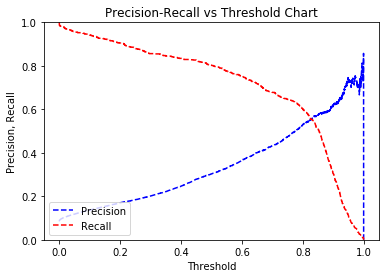

In [100]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [106]:
THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_test[col])[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.822435
recall,0.802311
precision,0.302663
roc_auc_score,0.813329


In [103]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8198
           1       0.30      0.80      0.44       779

    accuracy                           0.82      8977
   macro avg       0.64      0.81      0.67      8977
weighted avg       0.92      0.82      0.86      8977

[[6758 1440]
 [ 154  625]]


### Observations:  
Using Logistic regression Modal we are getting Recall value of 0.8, Higher Recall rate will help us minimize False Negatives. 

### Modelling using PCA

In [107]:
#applying PCA on data 
pca = PCA(random_state=100)

In [108]:
#apply pca on train data 
pca.fit(X_tr)

PCA(random_state=100)

In [109]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

(38602, 92)


In [110]:
X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(8977, 92)


In [111]:
# Create the parameter grid for GridSearchCV
param_grid = {
    'penalty':['l1','l2'],
    'C':[1e2,1e4],
    'solver': ['liblinear','saga'],
    'max_iter': [100,200]
}
# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [112]:
grid_search.fit(X_tr_pca, y_tr)
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.5min finished


We can get accuracy of 0.8517435021772932 using {'C': 10000.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


In [113]:
# Creating a model with the best parameters as per GridSearch
lr_pca = LogisticRegression(C= 0.1, max_iter= 100, penalty='l1', solver='liblinear')
lr_pca.fit(X_tr_pca, y_tr)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [114]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

[[6812 1386]
 [ 151  628]]
Accuracy of the logistic regression model with PCA:  0.8287846719394006


In [115]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8198
           1       0.31      0.81      0.45       779

    accuracy                           0.83      8977
   macro avg       0.65      0.82      0.67      8977
weighted avg       0.92      0.83      0.86      8977

[[6812 1386]
 [ 151  628]]


In [116]:
tele_hv_cust.drop('churn', axis=1, inplace=True)

In [117]:
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2]})

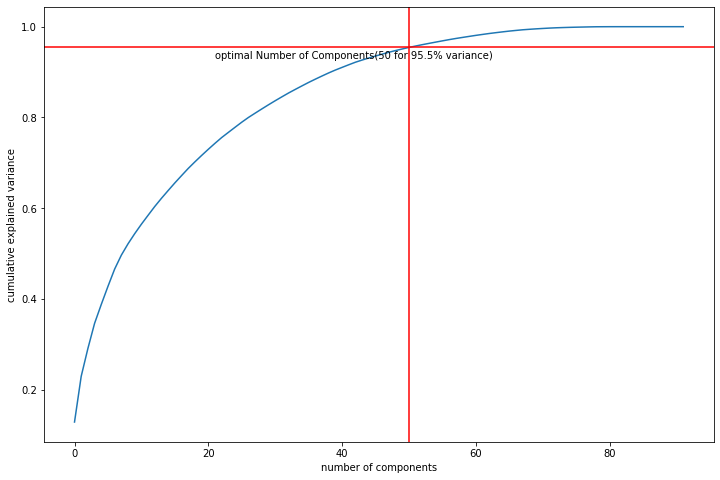

In [118]:
#Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(x=50,c ='red')
plt.axhline(y=0.955, c = 'red')
plt.annotate(s ='optimal Number of Components(50 for 95.5% variance)' ,xy=[50,0.955], xytext = (21, 0.930))
plt.show()

In [119]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 12.93,  23.  ,  29.12,  34.66,  38.82,  42.8 ,  46.61,  49.68,
        52.18,  54.41,  56.5 ,  58.46,  60.4 ,  62.2 ,  63.91,  65.59,
        67.19,  68.77,  70.22,  71.62,  72.98,  74.3 ,  75.57,  76.71,
        77.84,  78.96,  80.  ,  80.95,  81.88,  82.8 ,  83.69,  84.55,
        85.4 ,  86.19,  86.97,  87.73,  88.45,  89.15,  89.83,  90.47,
        91.05,  91.63,  92.19,  92.67,  93.12,  93.55,  93.97,  94.38,
        94.76,  95.11,  95.45,  95.76,  96.06,  96.34,  96.62,  96.9 ,
        97.17,  97.42,  97.65,  97.88,  98.11,  98.32,  98.53,  98.71,
        98.89,  99.06,  99.21,  99.35,  99.46,  99.56,  99.65,  99.73,
        99.8 ,  99.85,  99.89,  99.93,  99.96,  99.99, 100.02, 100.03,
       100.04, 100.04, 100.04, 100.04, 100.04, 100.04, 100.04, 100.04,
       100.04, 100.04, 100.04, 100.04])

In [120]:
# PCA with 50 components
pca_50 = PCA(n_components=50)

df_tr_pca_50 = pca_50.fit_transform(X_tr)
print(df_tr_pca_50.shape)

df_test_pca_50 = pca_50.transform(X_test)
print(df_test_pca_50.shape)

(38602, 50)
(8977, 50)


In [121]:
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_50, y_tr)

# Predicted probabilities
y_pred50 = lr_pca1.predict(df_test_pca_50)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred50)

print("Accuracy with 50 PCAs: ",accuracy_score(y_test,y_pred50))

Accuracy with 50 PCAs:  0.8218781330065723


In [122]:
print(classification_report(y_test,df_y_pred))
print(confusion_matrix(y_test,df_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8198
           1       0.30      0.80      0.44       779

    accuracy                           0.82      8977
   macro avg       0.64      0.81      0.67      8977
weighted avg       0.92      0.82      0.85      8977

[[6757 1441]
 [ 158  621]]


### Observations:  
1. Using PCA and Logistic regression Modal we are getting Recall value of 0.8, Higher Recall rate will help us minimize False Negatives. 
2. We have arrived at an optimal model where Recall is 0.80, Accuracy is 0.82. This shows models is doing good at majority(Adequate True Positives) and minority(less False Negatives) classes 

### Modelling with Random Forest Classifier based on PCA components

In [123]:
# Create the parameters for GridSearch
param_grid = {
    'max_depth': [10,15],
    'min_samples_leaf': range(60, 101, 20),
    'min_samples_split': range(140, 201, 20),
    'n_estimators': [100], 
    'max_features': [10,15]
}
# Create a tree based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [124]:
# Fit the grid search to the data
grid_search.fit(df_tr_pca_50, y_tr)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 17.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15], 'max_features': [10, 15],
                         'min_samples_leaf': range(60, 101, 20),
                         'min_samples_split': range(140, 201, 20),
                         'n_estimators': [100]},
             verbose=1)

In [125]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8718978000999956 using {'max_depth': 15, 'max_features': 15, 'min_samples_leaf': 60, 'min_samples_split': 140, 'n_estimators': 100}


In [126]:
# Creating a RandomForest model with the best parameters as per GridSearch
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=60, 
                             min_samples_split=140,
                             max_features=15,
                             n_estimators=100,
                            random_state=50,
                            max_leaf_nodes=15,
                            oob_score = True,
                            n_jobs = -1)

In [127]:
# fit df_tr_pca_50, df_test_pca_50, y_tr
rfc.fit(df_tr_pca_50,y_tr)

RandomForestClassifier(max_depth=15, max_features=15, max_leaf_nodes=15,
                       min_samples_leaf=60, min_samples_split=140, n_jobs=-1,
                       oob_score=True, random_state=50)

In [128]:
predi_tr = rfc.predict(df_tr_pca_50)

In [129]:
# predict
predictions = rfc.predict(df_test_pca_50)

In [131]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      8198
           1       0.36      0.67      0.46       779

    accuracy                           0.87      8977
   macro avg       0.66      0.78      0.69      8977
weighted avg       0.91      0.87      0.88      8977



In [132]:
# Sorting the dictionary in the ascending order of values
{k: v for k, v in sorted(coeff_dict.items(), key=lambda item: item[1])}

{'loc_ic_t2m_mou_8': -2.0679148423260902,
 'loc_ic_t2t_mou_8': -1.0935313729075238,
 'total_rech_data_8': -0.6933866129580758,
 'total_og_mou_8': -0.6455887957084805,
 'last_day_rch_amt_8': -0.5527884667468513,
 'total_rech_num_8': -0.48483636470347674,
 'fb_user_8': -0.44214131419684594,
 'spl_ic_mou_8': -0.3766870062614687,
 'vbc_3g_8': -0.3746116968137438,
 'vol_2g_mb_8': -0.3613922433370774,
 'loc_og_mou_8': -0.3174612922846187,
 'aon': -0.31038948825898316,
 'std_og_t2f_mou_8': -0.307861293095436,
 'avg_loc_ic_t2f_mou_av67': -0.23070331276086703,
 'avg_ic_others_av67': -0.17793263624590686,
 'std_ic_t2t_mou_8': -0.15736640495860293,
 'avg_std_ic_t2m_mou_av67': -0.042886990050326916,
 'avg_isd_ic_mou_av67': 0.03945441953638069,
 'avg_arpu_2g_av67': 0.05791102107193008,
 'avg_loc_og_mou_av67': 0.0654002149594379,
 'avg_std_og_mou_av67': 0.14714479878742212,
 'avg_total_rech_data_av67': 0.1482917698406628,
 'avg_loc_ic_t2t_mou_av67': 0.21704199843768668,
 'avg_total_rech_amt_av67': 0

### Taking the top 10 absolute values for feature coefficients:
####    1. loc_ic_t2m_mou_8 - local incoming outside operator mobile minutes of usage august
####    2. avg_loc_ic_t2m_mou_av67 - average local incoming outside operator mobile minutes of usage for june and july
####    3. loc_ic_t2t_mou_8 - local  incoming call within same operator minutes of usage in august
####    4. total_rech_data_8 - total recharge data august
####    5. total_og_mou_8 - total outgoing minutes of usage august
####    6. last_day_rch_amt_8 - last day recharge amount august
####    7. total_rech_num_8 - total recharge number august
####    8. fb_user_8 - social media scheme in august
####    9. avg_total_rech_amt_av67 - average total recharge amount for june and july
####    10.vbc_3g_8 - volume of 3g data august

### Summary Of Analysis and  Business Recommandations:
    1. In Good Phase Average Revenue per user for data is 500 and call is 2000
    2. Customers with less than 3 years with network are more likly to churn
    3. Local Incoming and Outgoing columns of Action phase are strong indicators of churn
    4. Action Phase can be the base of churn analysis
    5. With in the circle Local, STD and ISD Incoming and Outgoing are significantly reduced in the case of high value churn customers
    6. Roaming incoming and outgoing doesn't have much impact on churn
    7. 3G and 2G data comsumption significantly decreaded in churn customers in action phase
    8. Recommondations:        
         a. Company should provide VBC_3G_Aug and FB_User_8 attactive data packages
         
         b. Company should provide Outgoing for outside operator to mobile with some attactive tariff  packages
         
         c. Long term plans like 1 year plans with make customer to stay with network for long time 